Investigasi sampel data titanic berikut dengan cara :
Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
Cek apakah ada duplikat dan bagaimana handlenya ?
Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
import pandas as pd
# import data
df = pd.read_excel('titanic.xlsx')
data = df.copy()

In [5]:
# Showing top 5 rows of the data
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [7]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [8]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,survived,name,sex,age
251,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0
303,0,"Warren, Mr. Frank Manley",male,64.0
18,1,"Bazzani, Miss. Albina",female,32.0
377,1,"Collett, Mr. Sidney C Stuart",male,24.0
23,1,"Bidois, Miss. Rosalie",female,42.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [5]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [6]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name', 'sex',]

numericals = ['survived', 'age']

In [9]:
# Syntax numerical statistical summary
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


In [10]:
# Syntax describe method on categorical data
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


In [11]:
categoricals

['name', 'sex']

In [12]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Allison, Miss. Helen Loraine                                                          1
Kantor, Mrs. Sinai (Miriam Sternin)                                                   1
Bazzani, Miss. Albina                                                                 1
Allen, Miss. Elisabeth Walton                                                         1
Karnes, Mrs. J Frank (Claire Bennett)                                                 1
Keane, Miss. Nora A                                                                   1
Keane, Mr. Daniel                                                                     1
Kelly, Mrs. Florence "Fannie"                                                         1
Kirkland, Rev. Charles Leonard                                                        1
Knight, Mr. Robert J                                                                  1

In [13]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

Duplicate Handling

In [7]:
len(data)

500

In [8]:
len(data.drop_duplicates())

499

In [9]:
len(data.drop_duplicates()) / len(data)

0.998

In [10]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [11]:
# Langkah 1: Ambil baris duplikat (termasuk yang asli)
duplicates = data[data.duplicated(keep=False)]

In [12]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [13]:
duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [25]:
# Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah_duplikat')

# Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

# Tampilkan hasil
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [26]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [ ]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

Missing value handling

In [14]:
data.isna().sum()

survived     0
name         0
sex          0
age         49
dtype: int64

In [15]:
data.isnull().sum()

survived     0
name         0
sex          0
age         49
dtype: int64

In [16]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


survived
1    270
0    230
Name: count, dtype: int64


============= name =================


name
Eustis, Miss. Elizabeth Mussey                                                        2
Allison, Miss. Helen Loraine                                                          1
Kantor, Mrs. Sinai (Miriam Sternin)                                                   1
Bazzani, Miss. Albina                                                                 1
Allen, Miss. Elisabeth Walton                                                         1
Karnes, Mrs. J Frank (Claire Bennett)                                                 1
Keane, Miss. Nora A                                                                   1
Keane, Mr. Daniel                                                                     1
Kelly, Mrs. Florence "Fannie"                                                         1
Kirkland, Rev. Charles Leonard                                                        1
Knight, Mr. Robert J                                                                  1
Kvillner, Mr. Johan Henrik 


============= sex =================


sex
male      288
female    212
Name: count, dtype: int64


============= age =================


age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     1
45.5000     1
13.0000     1
67.0000     1
12.0000     1
0.8333      1
0.6667      1
7.

In [17]:
total_rows = len(data)
total_rows

500

In [18]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [19]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.80%)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [23]:
data['age'].dtype

dtype('float64')

In [40]:
data['age'].mode()[0]

np.float64(24.0)

In [41]:
data['age'].median()

np.float64(35.0)

In [42]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        data[column].fillna(data[column].median(), inplace=True)

C:\Users\Sang Surya\AppData\Local\Temp\ipykernel_2152\836656918.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\Sang Surya\AppData\Local\Temp\ipykernel_2152\836656918.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [43]:
data.isna().sum()

survived    0
name        0
sex         0
age         0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


Success removing NULL values!

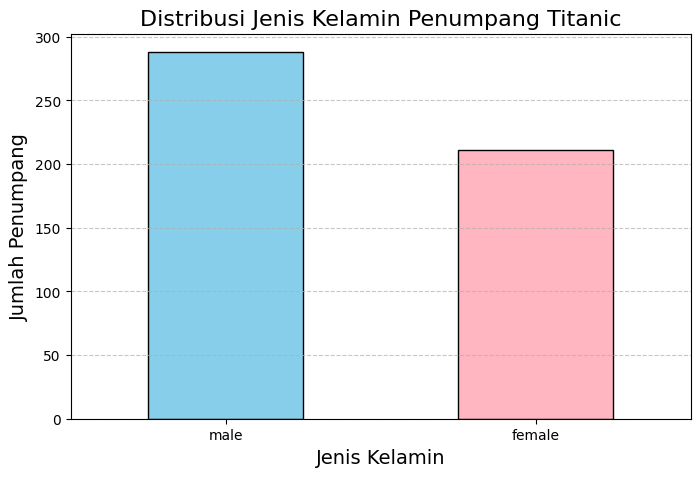

In [46]:
# Menampilkan grafik batang untuk kolom 'sex'
plt.figure(figsize=(8, 5))
data['sex'].value_counts().plot(kind='bar', color=['skyblue', 'lightpink'], edgecolor='black')
plt.title('Distribusi Jenis Kelamin Penumpang Titanic', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=14)
plt.ylabel('Jumlah Penumpang', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

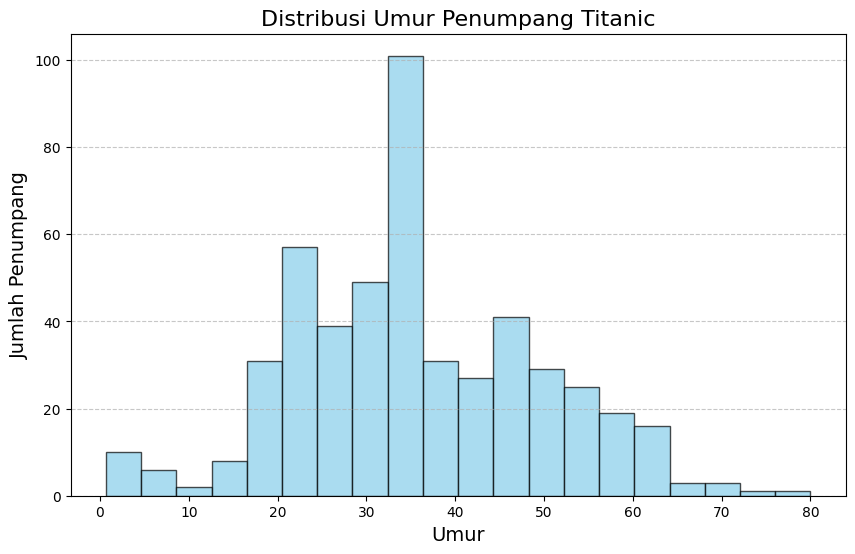

In [47]:
# Membuat histogram untuk kolom numerik
plt.figure(figsize=(10, 6))
data['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribusi Umur Penumpang Titanic', fontsize=16)
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Jumlah Penumpang', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

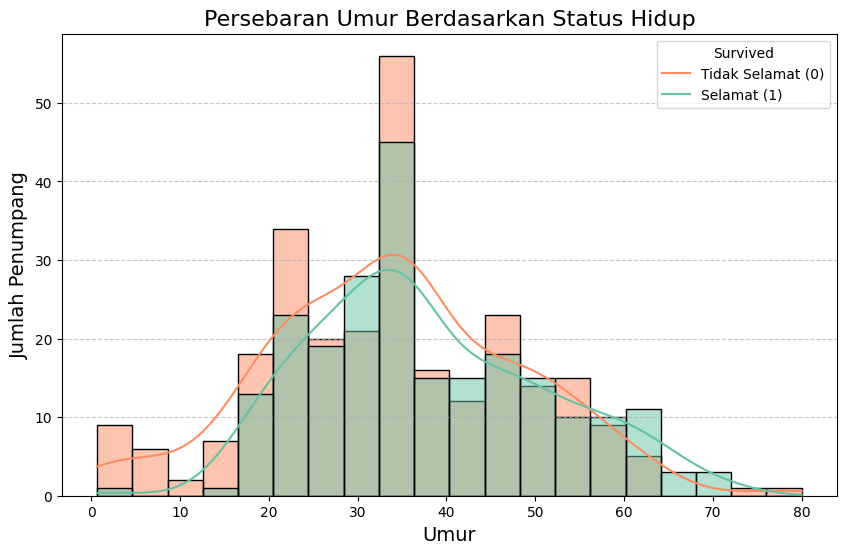

In [48]:
# Membuat persebaran umur berdasarkan status hidup
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='survived', kde=True, bins=20, palette='Set2', edgecolor='black')
plt.title('Persebaran Umur Berdasarkan Status Hidup', fontsize=16)
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Jumlah Penumpang', fontsize=14)
plt.legend(title='Survived', labels=['Tidak Selamat (0)', 'Selamat (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

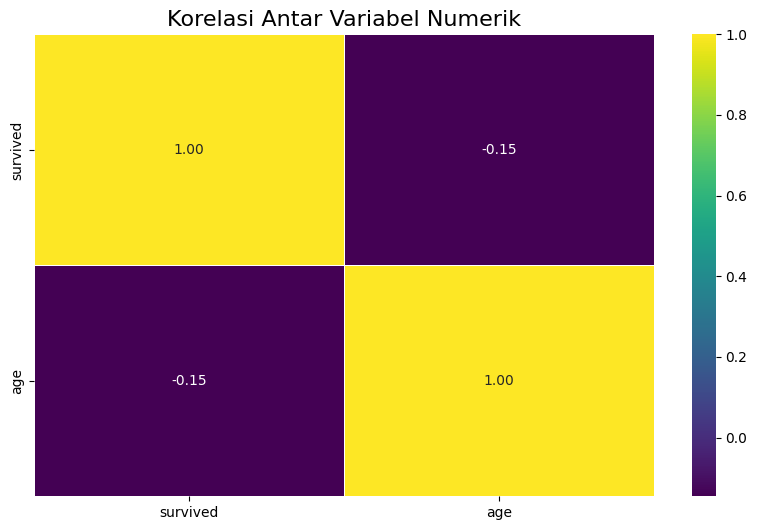

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['number'])

# Hitung korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()
